# **Projet machine learning : credit risk classification**

# Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/gdrive')
data = pd.read_csv('/gdrive/MyDrive/01 - Python/02 - Projets/02 - Credit risk classication/data.csv')

Mounted at /gdrive


#Importation des données et descriptions des variables

In [3]:
df = data.copy()
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**Description des variables**

- **`person_age`** : âge de l'individu
- **`person_income`** : revenu de l'individu par an
- **`person_home_ownership`** :
 - RENT : locataire
 - OWN : propriétaire
 - MORTGAGE : propriétaire avec un crédit
- **`person_emp_length`** : ancienneté au travail en année
- **`loan_intent`** : raison du crédit
- **`loan_grade`** : A - G
- **`loan_amount`**	: valeur du crédit demandé
- **`loan_int_rate`**	: taux d'intérêt du crédit
- **`loan_status`**	:
  - 0 : l'emprunteur a remboursé le credit
  - 1 : l'emprunteur n'a pas remboursé le credit (défaut de paiement)
- **`loan_percent_income`** : pourcentage du montant du crédit sur le montant du salaire
- **`cb_person_default_on_file`** : historique de défauts de paiements
  - Y : l'individu a des antécédents de défaut de paiement dans son dossier de crédit
  - N : l'individu n'a pas d'antécédents de défaut de paiement.
- **`cb_person_cred_hist_length`** : durée historique de crédit

# **Analyse exploratoire des données**

**Objectif :** comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.

**I) Analyse de la forme**

- Identification de la target : loan_status

- Nombre de lignes et de colonnes : 32581, 12

- Types de variables :
 - quantitatives : 8
 - qualitatives : 4

- Identification des valeurs manquantes :
 - loan_int_rate : 9.6 %
 - person_emp_length : 2.7 %

**II) Analyse du fond**

- Visualisation de la target :
 - 22% de défaut de paiement

- Signification des variables :
 - person_age : 27 ans (moyenne)
 - person_income : 66000 dollars/an (moyenne)
 - loan_amount : 9600 dollards (moyenne)
 - person_home_ownership : 50% de locataire
 - loan_grade : 75% de A/B/C
 - cb_person_default_on_file : 82% d'antécédents qui ont eu des défauts

- Analyse des relations :
 - Target/variables :
    - target/age : pas de lien
    - target/loan_int_rate : correlation 0.32 -> lien entre la capacité à rembourser de l'individu et le taux d'intérêt du prêt
    - target/loan_percent_income : correlation 0.38 -> lien entre la capacité à rembourser de l'individu et ce pourcentage définit plus haut
    - target/person_home_ownership : 32% des loueurs et 31% des others ne remboursent pas leurs crédits contrairement aux autres classes qui remboursent majoritairement
    - target/loan_grade : lien évident

 - Varibles entre elles :
    - person_income/loan_amount : lien

- Identification des outliers
 - person_age : max 144 ans (supp >80ans)
 - person_emp_length : max 123 ans (supp >50ans)

## Analyse de la forme

###Nombre de lignes et de colonnes

In [4]:
df.shape

(32581, 12)

###Types de variables

In [5]:
df.dtypes.value_counts()

int64      5
object     4
float64    3
dtype: int64

###Identification des valeurs manquantes

In [6]:
#plt.figure(figsize=(16,10))
#sns.heatmap(df.isna(),cbar=False)

In [7]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amount                      0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
100*(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

loan_int_rate                 9.563856
person_emp_length             2.747000
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amount                   0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

## Analyse du fond

###Visualisation de la target

In [9]:
df['loan_status'].value_counts(normalize=True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

###Signification des variables

In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amount,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Analyse des variables quantitatives

In [11]:
for col in df.select_dtypes(['float','int']):
  print(col)

person_age
person_income
person_emp_length
loan_amount
loan_int_rate
loan_status
loan_percent_income
cb_person_cred_hist_length


In [12]:
for col in df.select_dtypes(['float','int']):
  fig = px.histogram(df[col],
                     color_discrete_sequence=px.colors.qualitative.Pastel,
                     title=col)
  fig.show()

Analyse des variables qualitatives

In [13]:
for col in df.select_dtypes(['object']):
  level_counts=df[col].value_counts()
  fig=px.pie(values=level_counts.values,
            names=level_counts.index,
            color_discrete_sequence=px.colors.qualitative.Pastel,
            title=col)

  fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                    marker=dict(line=dict(color='#102000', width=0.2)))

  fig.data[0].marker.line.width = 2
  fig.data[0].marker.line.color='gray'
  fig.show()

###Imputations des valeurs manquantes et suppressions des outliers

In [14]:
df[df['person_age']>80].shape[0]

7

In [15]:
df[df['person_emp_length']>50].shape[0]

2

In [16]:
#imputation par la médiane les NaN des colonnes person_emp_length et loan_int_rate
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

#suppression des individus dont l'age est supérieur à 80 ans
df.drop(df[df['person_age']>80].index,axis=0,inplace=True)

#suppression des individus dont l'ancienneté est supérieure à 50 ans
df.drop(df[df['person_emp_length']>50].index,axis=0,inplace=True)

In [17]:
df.describe()

,person_age,person_income,person_emp_length,loan_amount,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32572.000000,3.257200e+04,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000
mean,27.714663,6.587888e+04,4.760776,9588.100209,11.009578,0.218194,0.170200,5.802898
std,6.186444,5.253279e+04,3.981220,6320.420066,3.081697,0.413026,0.106756,4.051041
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


###Relations target/variables

Création de sous-ensembles

In [18]:
have_paid = df[df['loan_status']==0]
have_not_paid = df[df['loan_status']==1]

Relation target/age

In [19]:
px.histogram(df, x='person_age', color="loan_status", barmode='group')

<ipython-input-20-a6fb97a48517>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



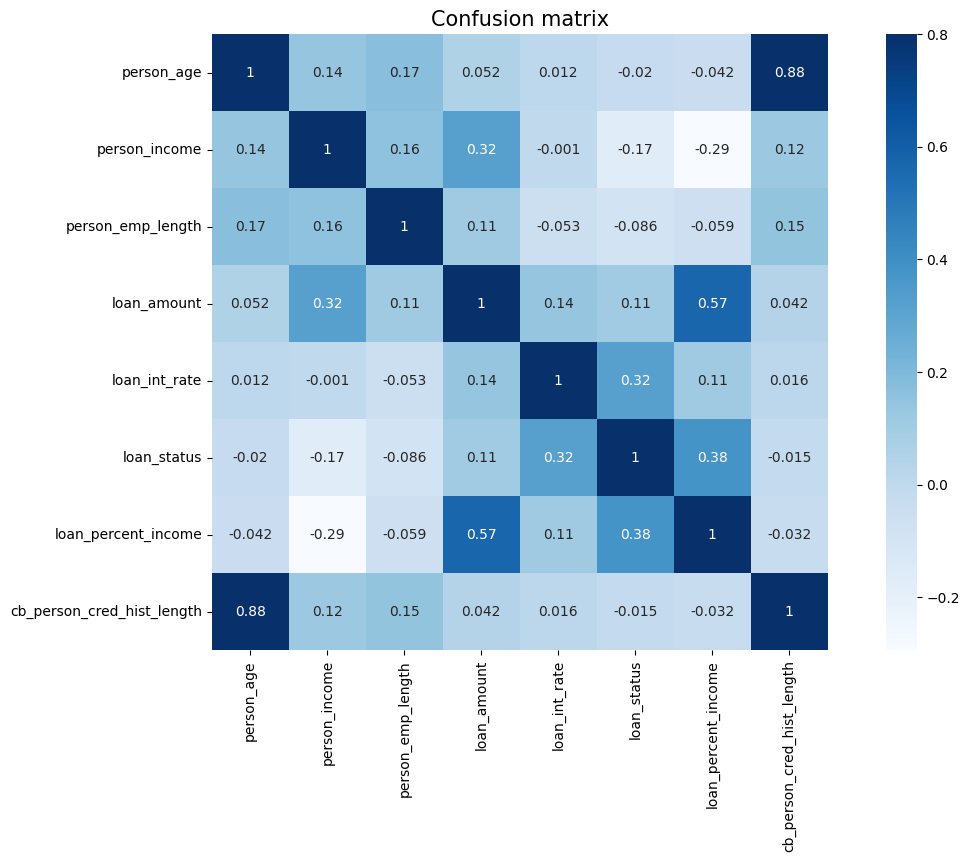

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Confusion matrix',fontsize=15);

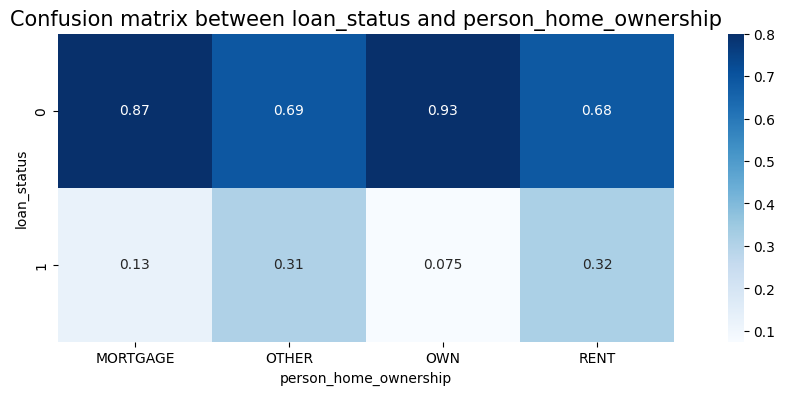

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(14,4)
sns.heatmap(pd.crosstab(df['loan_status'],df['person_home_ownership']).apply(lambda r: r/r.sum(), axis=0), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Confusion matrix between loan_status and person_home_ownership',fontsize=15);

In [22]:
pd.crosstab(df['loan_status'],df['loan_grade'])

loan_grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,9702,8747,5116,1485,343,71,1
1,1073,1701,1339,2140,621,170,63


###Test de Student

H0 : la moyenne des 2 échantillons est identique

In [23]:
from scipy.stats import ttest_ind

In [24]:
have_paid.shape

(25465, 12)

In [25]:
have_not_paid.shape

(7107, 12)

In [26]:
#le test est sensible si les 2 échantillons ne font pas la même taille
balanced_have_paid = have_paid.sample(have_not_paid.shape[0])
balanced_have_paid.shape

(7107, 12)

In [27]:
def t_test(col):
  alpha = 0.05
  stat, p = ttest_ind(balanced_have_paid[col],have_not_paid[col])
  if p < alpha:
    return 'rejet H0'
  else:
    return 0

In [28]:
for col in df.select_dtypes(['float','int']):
  print(f'{col:-<50} {t_test(col)}')

person_age---------------------------------------- rejet H0
person_income------------------------------------- rejet H0
person_emp_length--------------------------------- rejet H0
loan_amount--------------------------------------- rejet H0
loan_int_rate------------------------------------- rejet H0
loan_status--------------------------------------- rejet H0
loan_percent_income------------------------------- rejet H0
cb_person_cred_hist_length------------------------ rejet H0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



# **Pre-processing**

**Objectif :** Préparation des données pour l'entrainement des modèles.

**I) Mettre les données dans un format propice au ML**

- Train / Test
- Encodage
- Nettoyage des NaN

-> Premier modèle : évaluation - diagnostique des performances

**II) Améliorer la performance du modèle**

- Feature selection
- Feature engineering
- Feature scaling
- Suppression des outliers

In [29]:
df = data.copy()

In [30]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
trainset, testset = train_test_split(df, test_size=0.2,random_state=0)
print(trainset.shape)

(26064, 12)


- Nettoyage des donnéees
- Ajout de colonnes

In [33]:
def imputation(df):

  df = df.drop(df[df['person_age']>80].index,axis=0)
  df = df.drop(df[df['person_emp_length']>50].index,axis=0)
  return df

In [34]:
def features_engineering(df):

  df['income_group'] = pd.cut(df['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

  df['loan_amount_group'] = pd.cut(df['loan_amount'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])
  return df

In [35]:
def preprocessing(df):

  df = imputation(df)
  df = features_engineering(df)

  X = df.drop('loan_status', axis=1)
  y = df['loan_status']

  print(y.value_counts())

  return X,y

In [36]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

0    20289
1     5769
Name: loan_status, dtype: int64
0    5176
1    1338
Name: loan_status, dtype: int64


Création d'une pipeline :
- Données numériques :
 - SimpleImputer
 - StandarScaler

- Données catégorielles :
 - OneHotEncoder

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [38]:
numerical_features = make_column_selector(dtype_include=np.number)
categorial_features = make_column_selector(dtype_exclude=np.number)

numerical_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan,strategy='median'),StandardScaler())
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

In [39]:
preprocessor = make_column_transformer((numerical_pipeline,numerical_features),
                                      (categorical_pipeline,categorial_features))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b94cfba77c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b94cfba7340>)])

# Modélisation

In [40]:
from sklearn.tree import DecisionTreeClassifier

#Bagging
from sklearn.ensemble import RandomForestClassifier

#Boosting
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

In [41]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
XGBoost = make_pipeline(preprocessor, XGBClassifier(random_state=0))
SVM = make_pipeline(preprocessor, SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [42]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost': AdaBoost,
                  'XGBoost': XGBoost,
                  'SVM': SVM,
                  'KNN': KNN}

# Procédure d'évaluation

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [44]:
def evaluation(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

  N, train_score, val_score = learning_curve(model,X_train,y_train,cv=5,scoring='f1',train_sizes = np.linspace(0.1,1.0,10))

  plt.figure()
  plt.plot(N,train_score.mean(axis=1),label='train')
  plt.plot(N,val_score.mean(axis=1),label='validation')
  plt.xlabel('train_sizes')
  plt.legend()
  plt.show()

RandomForest
[[5142   34]
 [ 388  950]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5176
           1       0.97      0.71      0.82      1338

    accuracy                           0.94      6514
   macro avg       0.95      0.85      0.89      6514
weighted avg       0.94      0.94      0.93      6514



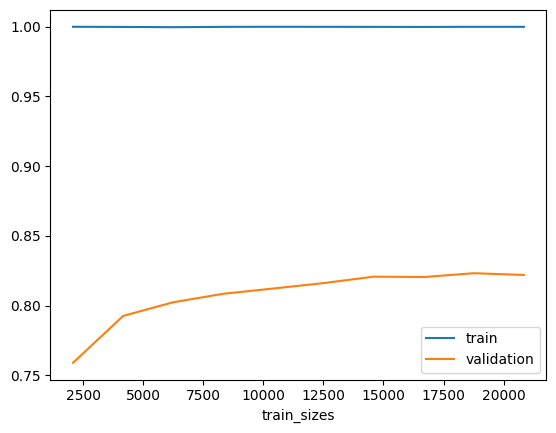

AdaBoost
[[4927  249]
 [ 467  871]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5176
           1       0.78      0.65      0.71      1338

    accuracy                           0.89      6514
   macro avg       0.85      0.80      0.82      6514
weighted avg       0.89      0.89      0.89      6514



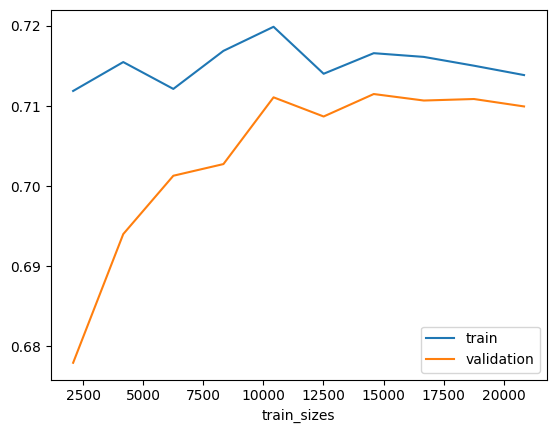

XGBoost
[[5128   48]
 [ 374  964]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5176
           1       0.95      0.72      0.82      1338

    accuracy                           0.94      6514
   macro avg       0.94      0.86      0.89      6514
weighted avg       0.94      0.94      0.93      6514



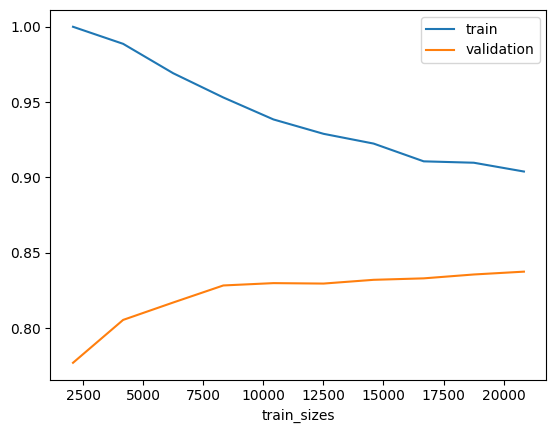

SVM
[[5108   68]
 [ 460  878]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5176
           1       0.93      0.66      0.77      1338

    accuracy                           0.92      6514
   macro avg       0.92      0.82      0.86      6514
weighted avg       0.92      0.92      0.91      6514



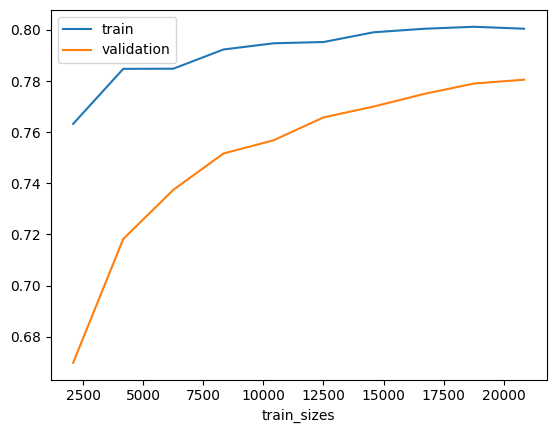

KNN
[[4954  222]
 [ 504  834]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      5176
           1       0.79      0.62      0.70      1338

    accuracy                           0.89      6514
   macro avg       0.85      0.79      0.81      6514
weighted avg       0.88      0.89      0.88      6514



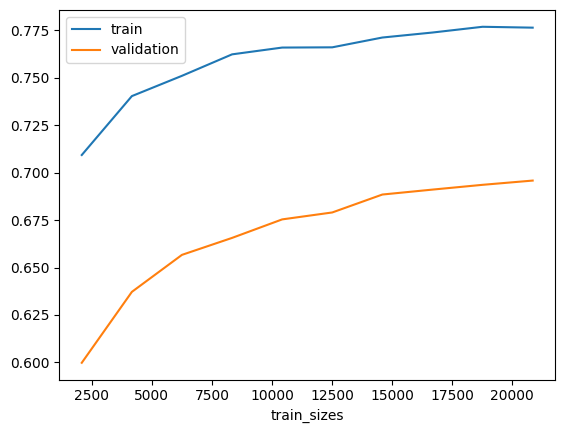

In [45]:
for name, model in dict_of_models.items():
  print(name)
  evaluation(model)

- RandomForest : overfitting
- AdaBoost : pas assez performant (courbes)
- XGBoost : courbes très intéressantes avec perspectives d'évolution en optimisant les hyperparamètres
- SVM : plus efficace avec peu de données et pas adapté dans notre cas
- KNN : pas l'algorithme adapté dans notre cas

# Optimisation

##RandomizedSearchCV

In [46]:
XGBoost

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b94cfba77c0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ign...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=0, ...))])

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
hyper_params = {
    'xgbclassifier__max_depth': range(2, 10, 1),
    'xgbclassifier__n_estimators': range(60, 220, 40),
    'xgbclassifier__learning_rate': [0.1, 0.01, 0.05]
}

In [49]:
grid = GridSearchCV(XGBoost,hyper_params,scoring='recall',cv=5)
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)

print(grid.best_params_)
print(classification_report(y_test,y_pred))

{'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 9, 'xgbclassifier__n_estimators': 180}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5176
           1       0.95      0.73      0.82      1338

    accuracy                           0.94      6514
   macro avg       0.94      0.86      0.89      6514
weighted avg       0.94      0.94      0.93      6514



[[5129   47]
 [ 367  971]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5176
           1       0.95      0.73      0.82      1338

    accuracy                           0.94      6514
   macro avg       0.94      0.86      0.89      6514
weighted avg       0.94      0.94      0.93      6514



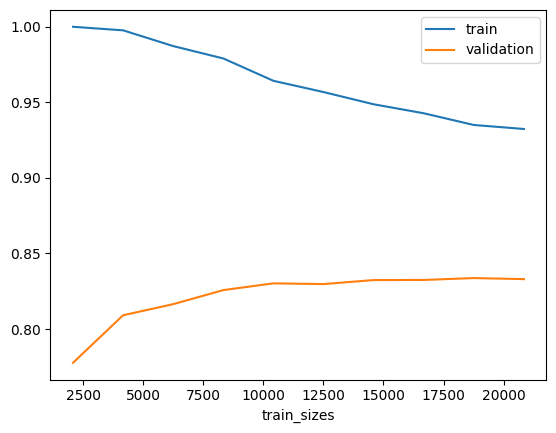

In [50]:
evaluation(grid.best_estimator_)

##Precision Recall Curve

Precision Recall Curve permet d'évaluer la performance d'un modèle de classification en particulier lorsque les classes des données sont déséquilibré

In [51]:
from sklearn.metrics import precision_recall_curve

In [52]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.predict_proba(X_test)[:,1])

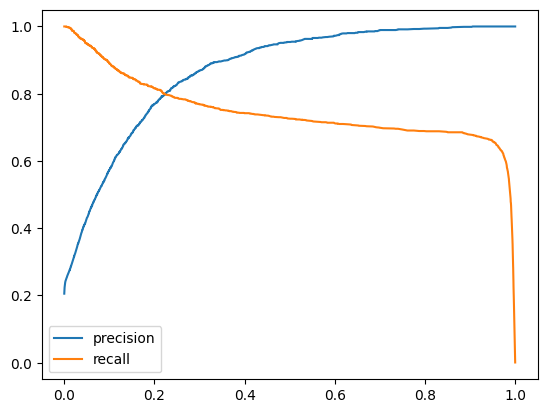

In [53]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [54]:
'''
def model_final(model, X, threshold):
  #Cette fonction permet de choisir nous même le seuil de décision.
  #Attention : il faut faire un compromis entre précision et recall.

  return model.predict_proba(X)[:,1] > threshold

y_pred = model_final(grid.best_estimator_, X_test, threshold=0.4)
'''

'\ndef model_final(model, X, threshold):\n  #Cette fonction permet de choisir nous même le seuil de décision.\n  #Attention : il faut faire un compromis entre précision et recall.\n\n  return model.predict_proba(X)[:,1] > threshold\n\ny_pred = model_final(grid.best_estimator_, X_test, threshold=0.4)\n'

#Résultats

In [55]:
accuracy_score = accuracy_score(y_test,y_pred)
precision_score = precision_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

In [56]:
print('accuracy_score =', accuracy_score)
print('precision_score =', precision_score)
print('recall_score =', recall_score)
print('f1_score =', f1_score)

accuracy_score = 0.9364445809026711
precision_score = 0.9538310412573674
recall_score = 0.7257100149476831
f1_score = 0.8242784380305602


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5176
           1       0.95      0.73      0.82      1338

    accuracy                           0.94      6514
   macro avg       0.94      0.86      0.89      6514
weighted avg       0.94      0.94      0.93      6514



In [58]:
print(confusion_matrix(y_test,y_pred))

[[5129   47]
 [ 367  971]]
